# Analyze Employee Exit Surveys

   Pada analisis ini kita akan menganalisis dua  exit surveys dari  Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Pada analisis kali ini diharapkan kita dapat mengetahui beberapa alasan mengapa karyawan keluar dari pekerjaannya. Namun karena alasan keluar pekerjaan sebenarnya sangatlah beragam untuk mempermudah analisis kali ini kita hanya menjawab dua pertanyaan berikut:
   - Apakah karyawan yang hanya bekerja untuk institut dalam waktu singkat mengundurkan diri karena ketidakpuasan? Bagaimana dengan karyawan yang sudah ada lebih lama?
   - Apakah karyawan yang lebih muda mengundurkan diri karena ketidakpuasan? Bagaimana dengan karyawan yang lebih tua?
  
Untuk memudahkan analisis kita hanya akan menganalisis lebih jauh beberapa kolom pada data
   
   Berikut beberapa kolom yang dipakai dari DETE:
   - ID: ID untuk identifikasi partisipan survey
   - SeparationType: Alasan mengapa keluar dari pekerjaan
   - Cease Date: Bulan/tahun keluar dari pekerjaan
   - DETE Start Date: Tahun masuk pekerjaan
   
   Berikut beberapa kolom yang dipakai dari TAFE:
   - Record ID: ID untuk identifikasi partisipan survey
   - Reason for ceasing employment: Alasan keluar dari pekerjaan
   - LengthofServiceOverall. Overall Length of Service at Institute (in years): Lama bekerja(dalam tahun)

## 1. Membaca Data Set
Pertama kita akan membaca dataset yang dipakai kedalam pandas lalu melihat data yang akan digunakan lebih lengkap lagi

In [57]:
import pandas as pd
import numpy as np

#Membaca data ke dari csv ke dataframe pandas
#Not stated dibaca sebagai NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv', na_values='Not Stated')




In [58]:
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Dari data diatas kita lihat ada 56 kolom pada dataframe asli namun sekali lagi kita hanya menggunakan beberapa data saja untuk mempermudah analisis kasus ini. Setelah ini kita lihat info dari dataframe DETE ini

In [59]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Karena kita hanya tertarik menggunakan 4 kolom yang disebutkan diatas maka kita akan periksa lebih dalam tentang kolom-kolom tersebut

1. ID: Tidak ada data yang null sehingga tidak perlu dilakukan *data cleaning* pada kolom ini

2. SeparationType: Tidak ada data yang null sehingga tidak perlu dilakukan *data cleaning* pada kolom ini 

3. Cease Date: Hanya terdapat 788 non-null baris yang berarti kita harus melakukan analisis lebih lanjut mengapa kolom ini ada yang kosong dan melakukan sesuatu untuk baris tersebut

4. DETE Start Date: Hanya terdapat 749 non-null baris yang berarti kita harus melakukan analisis lebih lanjut mengapa kolom ini ada yang kosong dan melakukan sesuatu untuk baris tersebut

In [60]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Dari data diatas kita lihat ada 72 kolom pada dataframe asli namun sekali lagi kita hanya menggunakan beberapa data saja untuk mempermudah analisis kasus ini. Setelah ini kita lihat info dari dataframe DETE ini

In [61]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Karena kita hanya tertarik menggunakan 3 kolom yang disebutkan diatas maka kita akan periksa lebih dalam tentang kolom-kolom tersebut

Record ID: Tidak ada data yang null sehingga tidak perlu dilakukan *data cleaning* pada kolom ini

Reason for ceasing employment: Ada 1 data yang null sehingga perlu dianalisis lebih lanjut

LengthofServiceOverall. Overall Length of Service at Institute (in years): Hanya terdapat 596 baris terisi dari 702 baris yang ada sehingga perlu dianalisa lebih lanjut

## 2. Data Cleaning
Dari data yang kita akan pakai ternyata banyak kolom yang tidak akan terpakai dan berisi NaN *values* karena itu kita akan membersihkan data dulu sebelum melakukan analisis lebih lanjut

In [62]:
# Membuang kolom tidak terpakai
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

print(dete_survey_updated.columns,'\n')
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object') 

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

Kita membuang kolom diatas karena kolom tersebut tidak berhubungan dengan analisis yang akan kita lakukan

## 3. Rename Kolom

Berikutnya kita akan membuat nama kolom dari data lebih terstandarisasi karena mungkin ada kolom yang sama pada kedua data namun berbeda format penulisan

In [63]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace('\s+', '_'))
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [64]:
mapping = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at cuhttps://app.dataquest.io/jupyter/notebooks/notebook/Basics.ipynb?dqMachineIp=10.142.0.93&dqPort=59329&dqToken=63e6b47a30550a8065756130eb5a69fb&dqUsername=80a8b20b1dd4a766a1b66ab41855b510#rrent workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping,axis = 1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

## 4. Filter Data
Karena kita hanya tertarik pada karyawan yang keluar karena resigned maka kita akan mencari resigned pada kolom separationtype. Pertama kita cek terlebih dahulu isi dari kolom separationtype dari kedua data

In [65]:
print(dete_survey_updated['separationtype'].value_counts(), '\n')
print(tafe_survey_updated['separationtype'].value_counts(), '\n')

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64 



Terlihat pada survey dari DETE terdapat banyak jenis resignation yang disambung dengan '-'. Karena itu kita akan membuat semua tipe resignation menjadi satu tipe resignation saja

In [66]:
# Update semua jenis resignation menjadi satu
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# cek apakah update yang dilakukan sudah benar
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Karena update sudah benar maka selanjutnya kita memfilter data untuk alasan keluar karyawan hanya resignation.

In [67]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"]=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=='Resignation'].copy()

## 5. Verify Data

Sebelum kita mulai membersihkan dan memanipulasi sisa data kita, Pertama kita verifikasi terlebih dulu apakah data yang digunakan sudah masuk akal. Pada langkah ini, kita akan fokus pada verifikasi bahwa tahun-tahun di kolom cease_date dan dete_start_date masuk akal. 



In [68]:
# Cek nilai unik pada kolom cease-date
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

Banyak ditemukan inkonsistensi pada data karena ada format yang menuliskan hanya tahun dan ada yang menuliskan bulannya juga. Untuk itu kita akan menggabungkan format dengan bulan kedalam tahun yang bersangkutan

In [69]:
# Menghilangkan bulan 
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Cek apakah sudah benar
dete_resignations['cease_date'].value_counts()


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [70]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Untuk lebih jelas kita dapat membuat box plot pada kolom ini

In [71]:
import seaborn as sns
ax1 = sns.boxplot(y=dete_resignation['cease_date'])
ax1.set_title('dete_resignation')

NameError: name 'dete_resignation' is not defined

In [72]:

ax2 = sns.boxplot(y=tafe_resignation['cease_date'])
ax2.set_title('tafe_resignation')

NameError: name 'tafe_resignation' is not defined

Dari kolom cease_date kedua dataframe diatas banyak tahun yang tidak ada di satu dataframe namun ada di dataframe lainnya. Dan juga ketidaksamaan jumlah karyawan yang resign pada tahun yang sama. Namun karena kita tidak tertarik pada analisis dalam tahun maka kita dapat mengabaikan hal tersebut.

## 6. Membuat Kolom Baru
Salah satu tujuan kita dalam analisis ini adalah "Apakah karyawan yang hanya bekerja untuk institut dalam waktu singkat mengundurkan diri karena ketidakpuasan? Bagaimana dengan karyawan yang sudah ada lebih lama?". Sehingga kita memerlukan kolom untuk tahu sudah berapa lama karyawan bekerja pada perusahaan tersebut. Untuk TAFE dataframe kita sudah punya kolom "institute_service" namun pada DETE belum ada. Sehingga kita perlu membuat kolom tersebut 

In [73]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']
dete_resignation['institute_service'].value_counts()

NameError: name 'dete_resignation' is not defined

## 7. Identify Dissatisfied Employees
Berikutnya kita akan menganalisis karyawan yang resigned karena tidak puas. Berikut kolom yang menandakan ketidakpuasan karyawan pada tiap data frame:

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dafe_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

Jika ada karyawan yang resign karena salah satu kolom diatas maka kita akan menandainya sebagai tidak puas. Setelah diupdate maka kolom dissastified kita hanya akan mengandung:

True: menandakan karyawan tidak puas karena sesuatu
False: menandakan karyawan keluar karena alasan lain
NaN: menandakan data hilang

In [74]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [75]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [76]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [77]:

# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## 8. Menggabungkan Data
Kita akan menggabungkan data dengan menambahkan nama institut yang mengambil survey lalu mendrop kolom yang tidak diperlukan

In [78]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [79]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
institute_service                                                            290
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
relocation                  

In [80]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

## 9. Clean the Service Column
Kita akan membersihkan kolom service dan mengkategorikannya sebagai berikut:

- New: <3 tahun di tempat kerja
- Experienced: 3-6 tahun di tempat kerja
- Established: 7-10 tahun di tempat kerja
- Veteran: >=11 tahun di tempat kerja


In [81]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

KeyError: 'institute_service'

In [82]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

KeyError: 'institute_service'

In [83]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

KeyError: 'institute_service_up'

## 10. Analisis Data

Akhirnya kita akan menjawab dua pertanyaan analisis yang disebutkan pada awal

### **Dari Lama waktu Bekerja**

In [84]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [85]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [86]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

KeyError: 'service_cat'

Dari analisis diatas, kita dapat mensimpulkan bahwa karyawan yang bekerja pada tempat yang sama >=7 tahun lebih mungkin resign karena tiddak puas daripada karyawan yang baru bekerja <7tahun.

### **Dari Umur**

In [87]:
age_pvt = combined_updated.pivot_table(index='age_cat', values='dissatisfied')
ax2 = age_pvt.plot(kind='bar', rot=30)
ax2.tick_params(bottom=False, left=False)
for key,spine in ax2.spines.items():
    spine.set_visible(False)
ax2.set_title('Dissatisfaction of Employees Based on Age')
ax2.get_legend().remove()

KeyError: 'age_cat'

Kita dapat menyimpulkan karyawan dengan umur 25 tahun kebawah lebih tidak mungkin resign karena tidak puas terhadap pekerjaannya. Hal ini mungkin karena mereka masih diawal karirnya dan karyawan yang mendekati waktu pensiunnya lebih mungkin untuk resign.

### **Dari Gender**

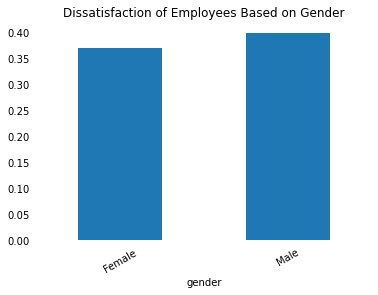

In [88]:

gender_pvt = combined_updated.pivot_table(index='gender', values='dissatisfied')
ax3 = gender_pvt.plot(kind='bar', rot=30)
ax3.tick_params(bottom=False, left=False)
for key,spine in ax3.spines.items():
    spine.set_visible(False)
ax3.set_title('Dissatisfaction of Employees Based on Gender')
ax3.get_legend().remove()

Ternyata lelaki lebih sering resign karena tidak puas terhadap pekerjaannya dibanding perempuan